# Binary Classification: Decision Tree - Sklearn

A decision tree is a flowchart-like tree structure where an internal node represents feature(or attribute), the branch represents a decision rule, and each leaf node represents the outcome. The topmost node in a decision tree is known as the root node. It learns to partition on the basis of the attribute value. It partitions the tree in recursively manner call recursive partitioning. This flowchart-like structure helps you in decision making. It's visualization like a flowchart diagram which easily mimics the human level thinking. That is why decision trees are easy to understand and interpret.

In this example we will try to build a decision tree classifier to predict which guests of the titanic survived, based on some given features.

## Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 
from sklearn.tree import export_graphviz
import graphviz

## Load data

In [2]:
# load data and store in df

"""
Survived: Outcome of survival (0 = No; 1 = Yes)
Pclass: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
Name: Name of passenger
Sex: Sex of the passenger
Age: Age of the passenger (Some entries contain NaN)
SibSp: Number of siblings and spouses of the passenger aboard
Parch: Number of parents and children of the passenger aboard
Ticket: Ticket number of the passenger
Fare: Fare paid by the passenger
Cabin Cabin number of the passenger (Some entries contain NaN)
Embarked: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)
"""

url = "https://raw.githubusercontent.com/lucaskienast/Classification-Models/main/1)%20Binary%20Classification/titanic_data.csv"
df = pd.read_csv(url)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Explore data

In [3]:
# show descriptive statistics
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Flynn, Mr. John",male,NaN,NaN,NaN,1601,NaN,C23 C25 C27,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


## Preprocessing

In [4]:
# drop cabin feature
df_preprocessed = df.copy()
df_preprocessed = df_preprocessed.drop(["Cabin"], axis=1)
# drop name feature
df_preprocessed = df_preprocessed.drop(["Name"], axis=1)
# drop ticket number
df_preprocessed = df_preprocessed.drop(["Ticket"], axis=1)
# remove observations without embarkment port
df_preprocessed = df_preprocessed.dropna()
# create dummy variables for categorical features
df_preprocessed = pd.get_dummies(df_preprocessed)
df_preprocessed.describe(include="all")

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251,0.363764,0.636236,0.182584,0.039326,0.778090
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648,0.481420,0.481420,0.386597,0.194506,0.415823
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850,0.000000,1.000000,0.000000,0.000000,1.000000
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200,1.000000,1.000000,1.000000,1.000000,1.000000


## Declare features and targets

In [5]:
# create feature (X) and target (y) variables
y = df_preprocessed["Survived"]
X = df_preprocessed.drop(["Survived"], axis=1)

## Train-Test Split

In [6]:
# 80:20 split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Train model

In [7]:
# build and train model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## Test model

In [8]:
# make predictions
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [9]:
# confusion matrix training
cm = confusion_matrix(y_train, yhat_train)
print ("Training Accuracy : ", accuracy_score(y_train, yhat_train))
print(cm)

Training Accuracy :  1.0
[[344   0]
 [  0 225]]


In [10]:
# confusion matrix testing
cm = confusion_matrix(y_test, yhat_test)
print ("Testing Accuracy : ", accuracy_score(y_test, yhat_test))
print(cm)

Testing Accuracy :  0.7202797202797203
[[65 15]
 [25 38]]


## Visualize decision tree

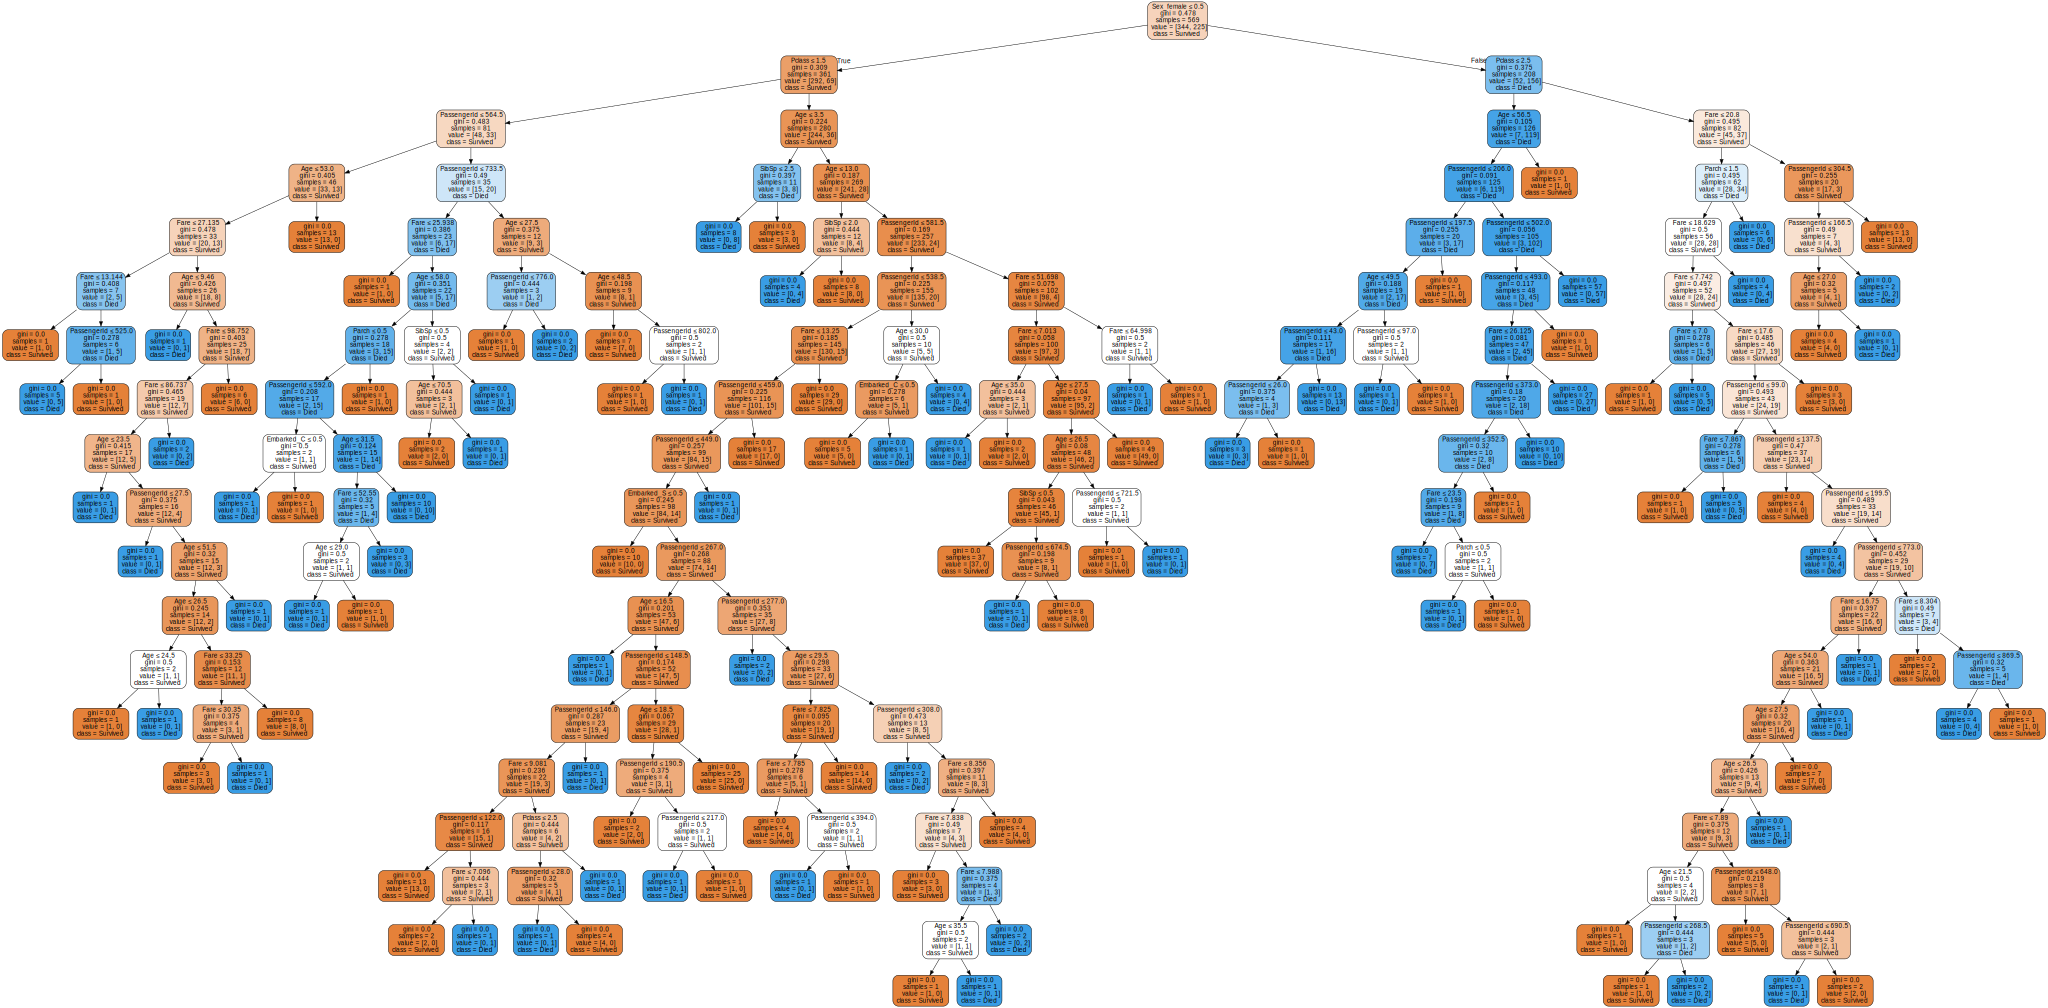

In [11]:
# visualize decision tree
dot_data = export_graphviz(model,
                          out_file=None,
                          feature_names=X_train.columns,
                          class_names=["Survived", "Died"],
                          filled=True,
                          rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph

## Optimize model

- criterion : optional (default=”gini”) or Choose attribute selection measure: This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.

- splitter : string, optional (default=”best”) or Split Strategy: This parameter allows us to choose the split strategy. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

- max_depth : int or None, optional (default=None) or Maximum Depth of a Tree: The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

In Scikit-learn, optimization of decision tree classifier performed by only pre-pruning. Maximum depth of the tree can be used as a control variable for pre-pruning. In the following the example, you can plot a decision tree on the same data with max_depth=3. Other than pre-pruning parameters, You can also try other attribute selection measure such as entropy.

In [12]:
# build and train new model
#model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, min_samples_split=10)
model = DecisionTreeClassifier(criterion="gini", max_depth=3)
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [13]:
# make predictions
# Making predictions
yhat_train = model.predict(X_train)
yhat_test = model.predict(X_test)

In [14]:
# confusion matrix training
cm = confusion_matrix(y_train, yhat_train)
print ("Training Accuracy : ", accuracy_score(y_train, yhat_train))
print(cm)

Training Accuracy :  0.8312829525483304
[[292  52]
 [ 44 181]]


In [15]:
# confusion matrix testing
cm = confusion_matrix(y_test, yhat_test)
print ("Testing Accuracy : ", accuracy_score(y_test, yhat_test))
print(cm)

Testing Accuracy :  0.7552447552447552
[[68 12]
 [23 40]]


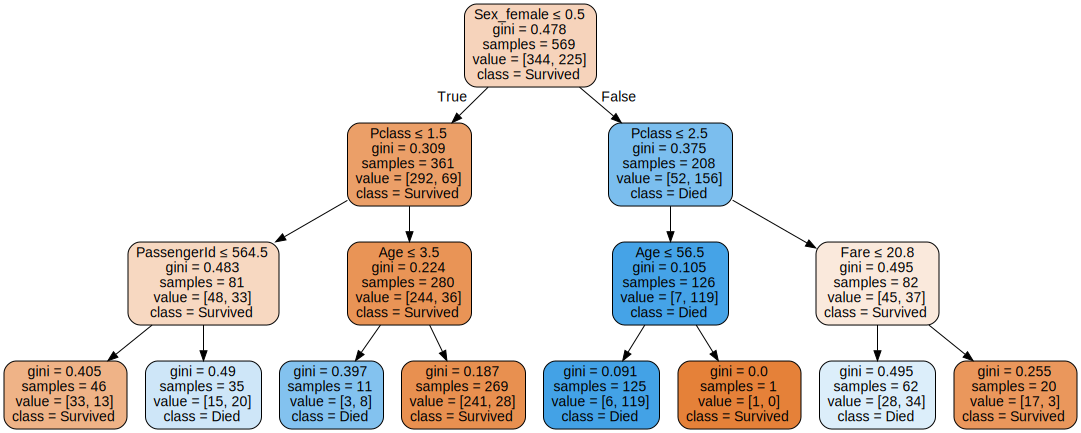

In [16]:
# visualize decision tree
dot_data = export_graphviz(model,
                          out_file=None,
                          feature_names=X_train.columns,
                          class_names=["Survived", "Died"],
                          filled=True,
                          rounded=True,
                          special_characters=True)
graph = graphviz.Source(dot_data)
graph